In [1]:
import os
from utils.configs import ExperimentConfigs
from data.particle_clouds.jets import JetDataModule

config = ExperimentConfigs('config.yaml')
jets = JetDataModule(config=config)


In [2]:
jets.setup()
jets.train_dataloader()

In [7]:
len(jets.test_dataloader())

TypeError: object of type 'NoneType' has no len()

In [6]:
for batch in jets.val_dataloader():
    print(batch.target.continuous.shape)
    

torch.Size([100, 128, 3])
torch.Size([100, 128, 3])


In [9]:
# open json file
import json

def get_from_json(key, path, name='metadata.json'):
    path = os.path.join(path, name)
    with open(path, 'r') as f:
        metadata = json.load(f)
    return metadata[key]

stats = get_from_json('target_stats')

jets.target.postprocess(continuous='standardize', discrete='discretize', **stats)

/home/df630/Multimodal-Bridges/multimodal_bridges/data/particle_clouds/particles.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.continuous = (self.continuous * torch.tensor(std)) + torch.tensor(mean)


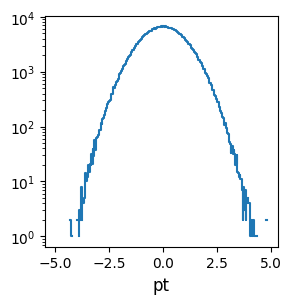

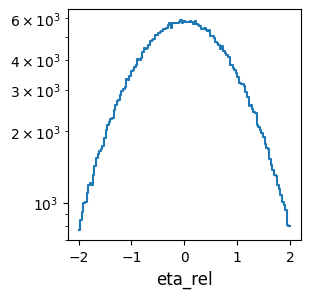

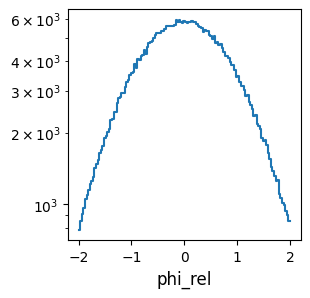

In [2]:
jets.source.histplot(
    feature="pt", fill=False, log_scale=(False, True)
)  # momentum distrbution
jets.source.histplot(
    feature="eta_rel",
    fill=False,
    binrange=(-2, 2),
    binwidth=0.03,
    log_scale=(False, True),
)  # rapidity distribution
jets.source.histplot(
    feature="phi_rel",
    fill=False,
    binrange=(-2, 2),
    binwidth=0.03,
    log_scale=(False, True),
)  # azimuthal angle distribution

In [4]:
len(jets.source)

10000

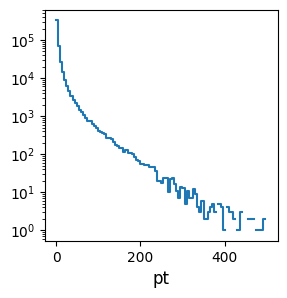

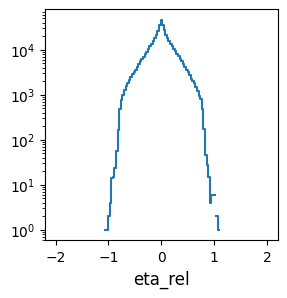

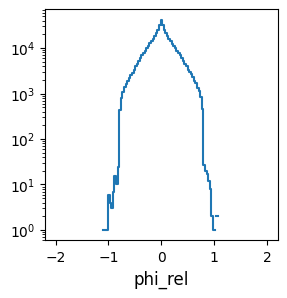

In [2]:
jets.target.histplot(
    feature="pt", fill=False, binrange=(-1, 500), binwidth=5, log_scale=(False, True)
)  # momentum distrbution
jets.target.histplot(
    feature="eta_rel",
    fill=False,
    binrange=(-2, 2),
    binwidth=0.03,
    log_scale=(False, True),
)  # rapidity distribution
jets.target.histplot(
    feature="phi_rel",
    fill=False,
    binrange=(-2, 2),
    binwidth=0.03,
    log_scale=(False, True),
)  # azimuthal angle distribution

In [8]:
import numpy as np
val,_ = np.histogram(
        jets.target.multiplicity, bins=np.arange(0, 128 + 2, 1), density=True
    )

sum(val.tolist())

0.9999999999999997

In [3]:
152-24

128

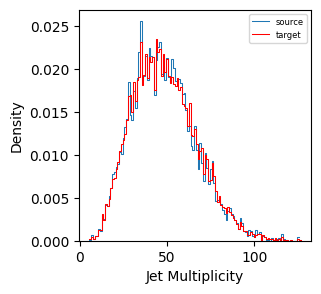

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
sns.histplot(
    jets.source.multiplicity.squeeze(-1),
    element="step",
    fill=False,
    discrete=True,
    lw=0.75,
    stat="density",
    log_scale=(False, False),
    ax=ax,
    label="source",
)
sns.histplot(
    jets.target.multiplicity.squeeze(-1),
    element="step",
    fill=False,
    discrete=True,
    lw=0.75,
    stat="density",
    log_scale=(False, False),
    ax=ax,
    color='r',
    label="target",
)
ax.legend(fontsize=6)
ax.set_xlabel("Jet Multiplicity")
plt.show()

In [16]:
data_module = JetDataModule(config=config, preprocess=False)

# Setup and get train dataloader
data_module.setup()
train_loader = data_module.train_dataloader()

# Inspect the first batch
for batch in train_loader:
    source, target, context = batch.source, batch.target, batch.context
    break

In [16]:


100 * 128*0.7

8960.0

<Axes: ylabel='Count'>

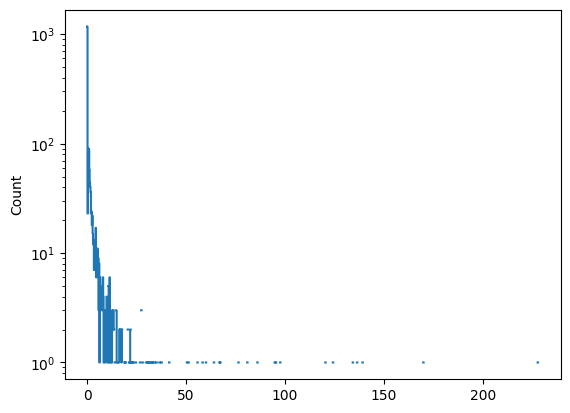

In [17]:
import seaborn as sns

batch.target.mask_modes()

sns.histplot(batch.target.continuous[...,0], element="step", fill=False, log_scale=(False, True))

In [18]:
batch.target.continuous.shape

torch.Size([2048, 3])